<h1 align='center'> CS353 Machine Learning Lab</h1>
<h1 align='center'>16/03/21</h1>
<h2 align='center'>Keerti Chaudhary (181CO226)</h2>

<h2>Loading Libraries</h2>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas  as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Loading dataset</h2>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cols=[]
for i in range(0,32):
  cols.append(i)
data = pd.read_csv(
    "/content/drive/My Drive/CNN/UCI_Credit_Card.csv"
)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<h2>Data Analysis</h2>

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<h2>Count plot of "default.payment.next.month"

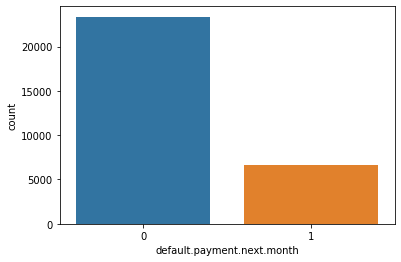

In [ ]:
import seaborn as sns
sns.countplot(data["default.payment.next.month"])
plt.show()

<h2>Data Heatmap

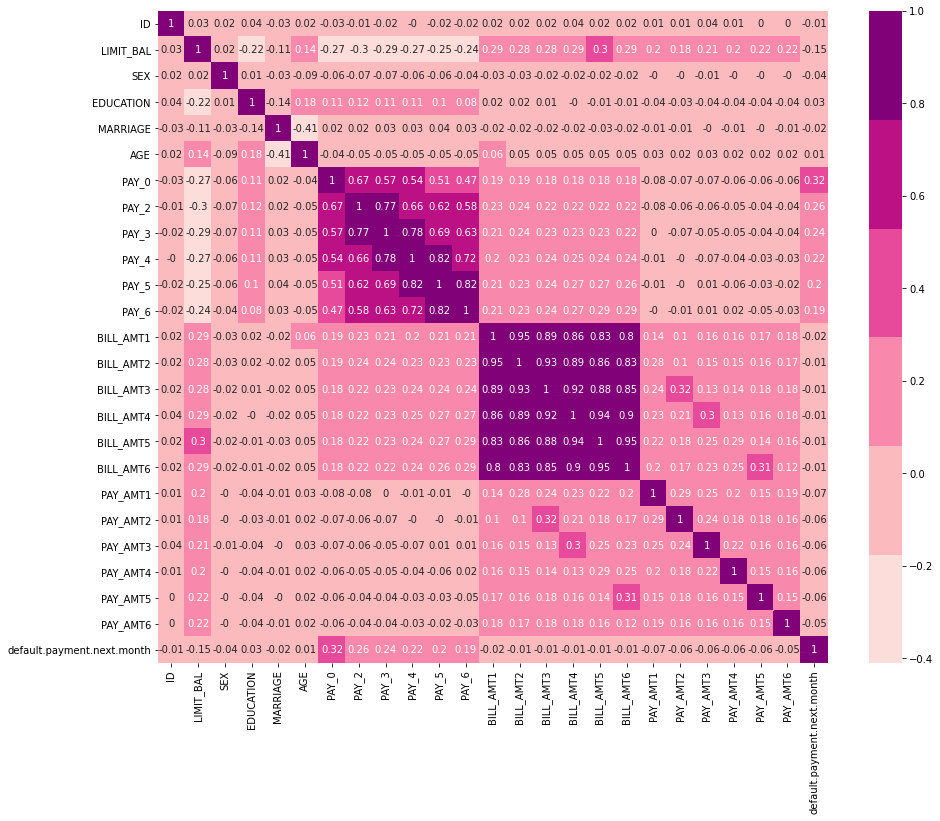

In [ ]:
plt.figure(figsize=(15,12))
cor = round(data.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('RdPu'), annot = True)

<h2>Limit Balance and Default Rate Distribution

Text(0.5, 1.05, 'Limit Balance and Default Rate Distribution')

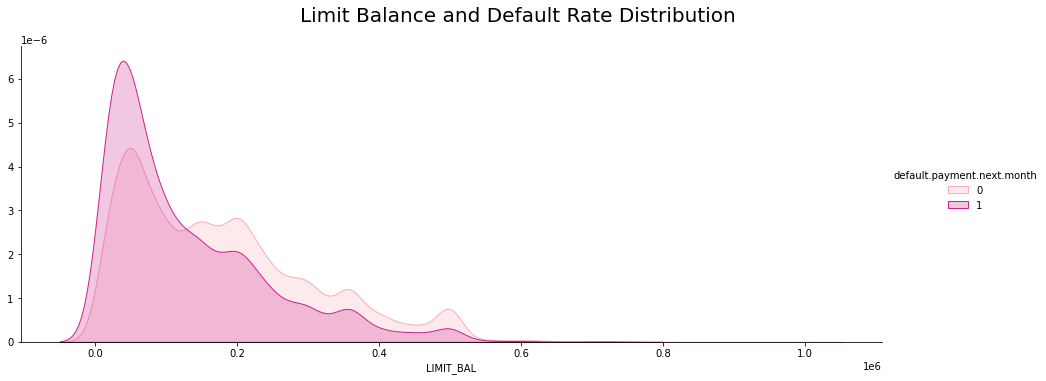

In [ ]:
age_survival_dist = sns.FacetGrid(data, hue = 'default.payment.next.month', aspect = 2.5, size = 5, palette = 'RdPu')
age_survival_dist.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
age_survival_dist.add_legend()
plt.suptitle('Limit Balance and Default Rate Distribution', fontsize = 20, y = 1.05)

<h2>Age and Default Rate Distribution

Text(0.5, 1.05, 'Age and Default Rate Distribution')

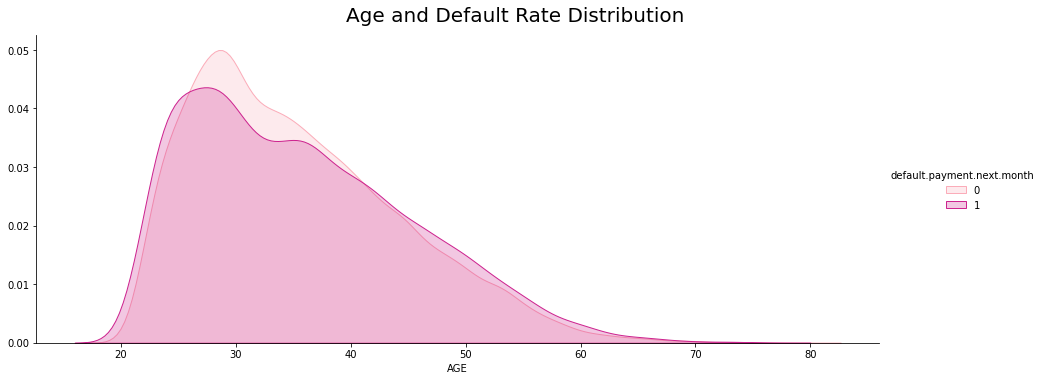

In [ ]:

age_survival_dist = sns.FacetGrid(data, hue = 'default.payment.next.month', aspect = 2.5, size = 5, palette = 'RdPu')
age_survival_dist.map(sns.kdeplot, 'AGE', shade = True)
age_survival_dist.add_legend()
plt.suptitle('Age and Default Rate Distribution', fontsize = 20, y = 1.05)

<h2>Data Cleaning

In [ ]:
data = data.drop(['ID'], axis = 1)

In [ ]:
data['MARRIAGE'].replace(0, 3, inplace = True)
data['EDUCATION'].replace([0, 5, 6], 4, inplace = True)

<h2>Splitting test and train data

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(X.head())
print(y.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
0    20000.0    2          2         1  ...       0.0       0.0       0.0       0.0
1   120000.0    2          2         2  ...    1000.0    1000.0       0.0    2000.0
2    90000.0    2          2         2  ...    1000.0    1000.0    1000.0    5000.0
3    50000.0    2          2         1  ...    1200.0    1100.0    1069.0    1000.0
4    50000.0    1          2         1  ...   10000.0    9000.0     689.0     679.0

[5 rows x 23 columns]
0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

       LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6
12880   130000.0    2          1  ...     438.0     780.0       0.0
14868   130000.0    2          3  ...    1536.0    2451.0    2659.0
14280   140000.0    1          3  ...    2600.0    2300.0    5300.0
5318    270000.0    2          2  ...    7952.0    4000.0    2000.0
15421   220000.0    2          2  ...    7804.0    8254.0    6640.0

[5 rows x 23 columns]
12880    0
14868    0
14280    1
5318     0
15421    1
Name: default.payment.next.month, dtype: int64
       LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6
8225     20000.0    1          1  ...    1600.0       0.0     644.0
10794    20000.0    2          2  ...       0.0    1000.0       0.0
9163    230000.0    2          1  ...       0.0       0.0       0.0
26591   100000.0    1          2  ...    2000.0    2000.0    2000.0
6631    150000.0    1          1  ...    5153.0    7833.0    7130.0

[5 rows x 23 columns]
8225     0
10794    0
9163     0
265

<h2>Fitting K-NN to the Training set</h2>

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn_parameters = {'n_neighbors': range(6,9),
                  'leaf_size': [3, 5, 7, 10]
                 }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(knn, knn_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
knn = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

<h2>Evaluation of performance of KNN Model</h2>


In [ ]:
knn.predict(X_test)
round(knn.score(X_train, y_train) * 100, 2)

79.8

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5661,  207],
       [1481,  151]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7749333333333334

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      5868
           1       0.42      0.09      0.15      1632

    accuracy                           0.77      7500
   macro avg       0.61      0.53      0.51      7500
weighted avg       0.71      0.77      0.71      7500

